# Blood Pressure Reduction

### Observational Study

### Project Idea: 
Explore the relationship between medication (or baseline blood pressure) and blood pressure reduction using synthetic blood pressure data.

### Methodology: 
Conduct summary statistics and visualize data distributions. Construct a causal graph to illustrate relationships between variables. Perform Ordinary Least Squares (OLS) regression to estimate the causal effect of medication (or baseline blood pressure) on blood pressure reduction. Assess sensitivity through bootstrap resampling.

# Process

Here are the steps you can follow for the project:
1.	Define the Research Question: Clearly define the research question you want to address. In this case, it's to determine the effectiveness of a new medication in reducing blood pressure.
2.	Data Collection: Gather relevant data for the analysis. This includes data on the medication, patient demographics, blood pressure measurements before and after medication administration, and potential confounding variables such as age, weight, and lifestyle factors.
3.	Data Preprocessing: Clean the data and prepare it for analysis. This involves handling missing values, outliers, and encoding categorical variables if necessary.
4.	Exploratory Data Analysis (EDA): Explore the data to understand its characteristics, relationships, and potential confounders. Visualizations and summary statistics can be helpful for this step.
5.	Graphical Causal Model Construction: Build a graphical causal model (such as a Directed Acyclic Graph - DAG) to represent the causal relationships among variables. Identify variables that could act as confounders in the relationship between the medication and blood pressure reduction.
6.	Adjustment for Confounders: Use the graphical causal model to identify potential confounders that need to be adjusted for. This can be done using techniques like backdoor adjustment or propensity score matching.
7.	Estimate Causal Effect: Once the confounders are adjusted for, estimate the causal effect of the medication on blood pressure reduction. This can be done using methods like regression analysis, instrumental variable estimation, or propensity score weighting.
8.	Assess Sensitivity: Conduct sensitivity analysis to assess the robustness of your results to potential biases or unmeasured confounders.
9.	Interpret Results: Interpret the findings in the context of the research question. Discuss the implications of the medication's effectiveness in reducing blood pressure and any limitations of the analysis.
10.	Communicate Findings: Present the results to stakeholders in a clear and understandable manner. This may involve creating reports, presentations, or visualizations to communicate the findings effectively.
11.	Iterate and Refine: Review the results, gather feedback, and refine the analysis if necessary. Iterative refinement can help improve the accuracy and reliability of the findings.

By following these steps, you can determine the effectiveness of the medication in reducing blood pressure while accounting for potential confounders.


# Create the data set

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
# ^^^ pyforest auto-imports - don't write above this line
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Define variables and parameters
num_samples = 1000

# Generate synthetic data for variables
age = np.random.randint(18, 80, num_samples)
weight = np.random.normal(70, 10, num_samples)
lifestyle_factor = np.random.normal(0, 1, num_samples)

# Introduce treatment effect of medication
medication_effect = np.random.normal(0, 5, num_samples)  # Adjust as needed
baseline_blood_pressure = np.random.normal(120, 10, num_samples)
blood_pressure_reduction = baseline_blood_pressure - medication_effect

# Create DataFrame
data = pd.DataFrame({
    'Age': age,
    'Weight': weight,
    'Lifestyle_Factor': lifestyle_factor,
    'Baseline_Blood_Pressure': baseline_blood_pressure,
    'Blood_Pressure_Reduction': blood_pressure_reduction
})

# Optionally add confounding variables and adjust for them

# Save or use the synthetic dataset for further analysis
data.to_csv('synthetic_bo_data.csv', index=False)

In [3]:
data

,Age,Weight,Lifestyle_Factor,Baseline_Blood_Pressure,Blood_Pressure_Reduction
0,55,56.357874,-0.296783,133.083237,133.609883
1,28,65.380106,0.758089,120.570713,112.507666
2,76,57.945119,1.003280,121.780154,116.533612
3,18,58.939319,-1.032959,129.657087,135.397257
4,34,66.663608,-1.253558,119.334762,121.310763
...,...,...,...,...,...
995,41,64.557211,0.133804,125.389968,122.034625
996,25,75.775277,-0.073356,123.118877,122.056650
997,57,71.241318,-1.747153,123.580274,122.760589
998,43,57.880556,0.282395,120.677350,124.552260


# Exploratory Data Analysis (EDA)

In [4]:
# Display basic information about the dataset
print("Basic information about the dataset:")
print(data.info())

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1000 non-null   int32  
 1   Weight                    1000 non-null   float64
 2   Lifestyle_Factor          1000 non-null   float64
 3   Baseline_Blood_Pressure   1000 non-null   float64
 4   Blood_Pressure_Reduction  1000 non-null   float64
dtypes: float64(4), int32(1)
memory usage: 35.3 KB
None


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information about the dataset
print("Basic information about the dataset:")
print(data.info())

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1000 non-null   int32  
 1   Weight                    1000 non-null   float64
 2   Lifestyle_Factor          1000 non-null   float64
 3   Baseline_Blood_Pressure   1000 non-null   float64
 4   Blood_Pressure_Reduction  1000 non-null   float64
dtypes: float64(4), int32(1)
memory usage: 35.3 KB
None


In [5]:
# Summary statistics of numerical variables
print("\nSummary statistics of numerical variables:")
print(data.describe())


Summary statistics of numerical variables:
               Age       Weight  Lifestyle_Factor  Baseline_Blood_Pressure  \
count  1000.000000  1000.000000       1000.000000              1000.000000   
mean     49.014000    70.266088          0.024184               119.903246   
std      17.996936    10.003760          1.014123                10.589553   
min      18.000000    35.809229         -3.542566                90.035708   
25%      34.000000    63.688979         -0.667272               112.679129   
50%      49.000000    70.391789          0.008565               119.740885   
75%      65.000000    76.943243          0.729229               126.835249   
max      79.000000   104.776792          3.117713               150.816866   

       Blood_Pressure_Reduction  
count               1000.000000  
mean                 119.921480  
std                   11.662141  
min                   84.944186  
25%                  111.709475  
50%                  119.835326  
75%            

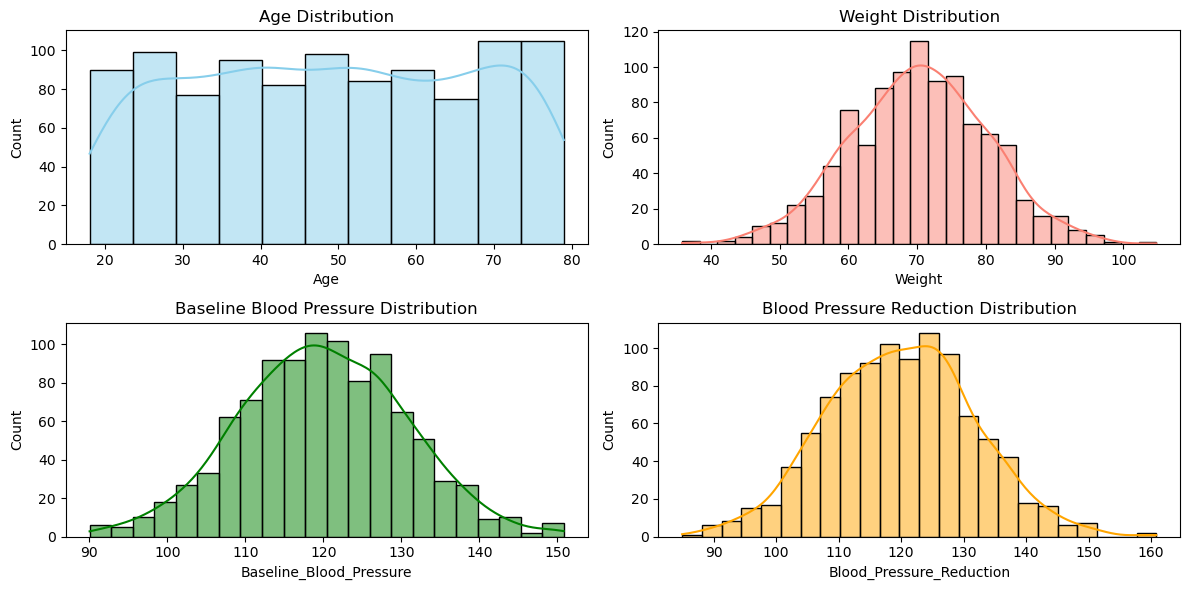

In [6]:
# Distribution plots for numerical variables
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(data['Age'], kde=True, color='skyblue')
plt.title('Age Distribution')
plt.subplot(2, 2, 2)
sns.histplot(data['Weight'], kde=True, color='salmon')
plt.title('Weight Distribution')
plt.subplot(2, 2, 3)
sns.histplot(data['Baseline_Blood_Pressure'], kde=True, color='green')
plt.title('Baseline Blood Pressure Distribution')
plt.subplot(2, 2, 4)
sns.histplot(data['Blood_Pressure_Reduction'], kde=True, color='orange')
plt.title('Blood Pressure Reduction Distribution')
plt.tight_layout()
plt.show()

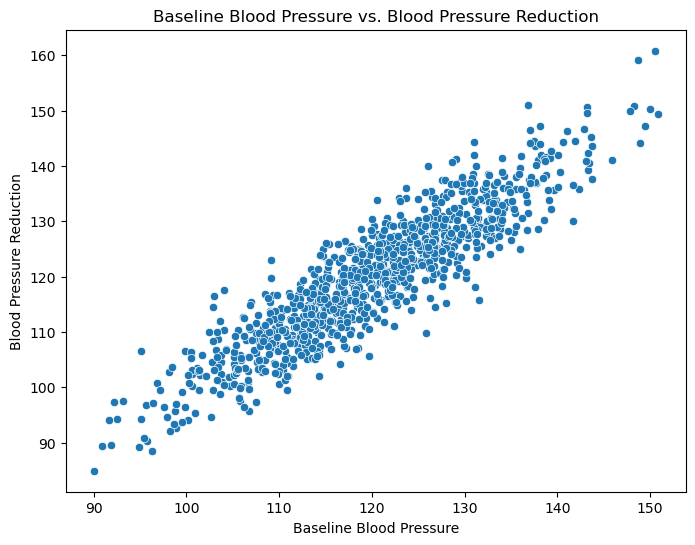

In [7]:
# Scatter plot of baseline blood pressure vs. blood pressure reduction
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Baseline_Blood_Pressure', y='Blood_Pressure_Reduction', data=data)
plt.title('Baseline Blood Pressure vs. Blood Pressure Reduction')
plt.xlabel('Baseline Blood Pressure')
plt.ylabel('Blood Pressure Reduction')
plt.show()

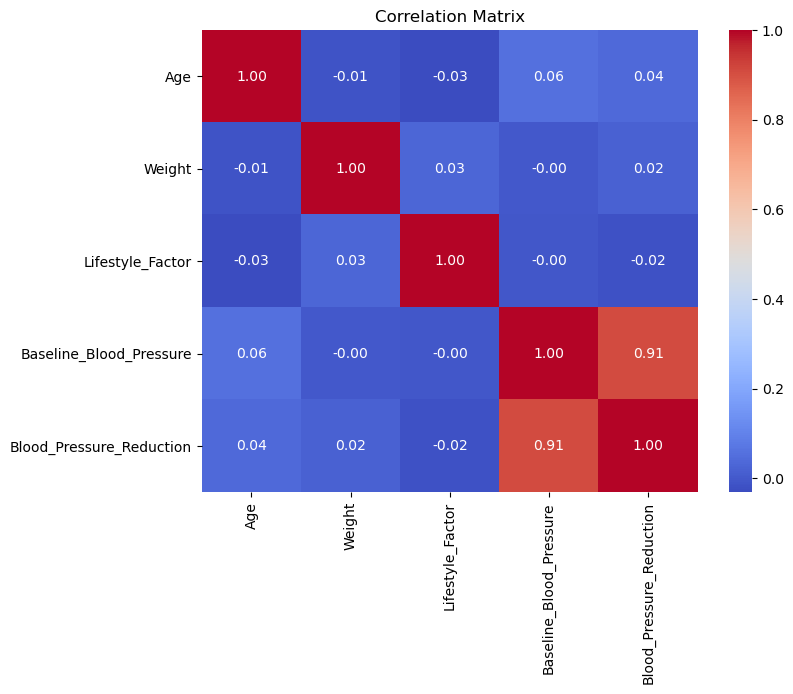

In [8]:
# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Directed Acyclic Graphs (DAGs)

To construct a graphical causal model, you typically use Directed Acyclic Graphs (DAGs) to represent the causal relationships among variables. In this case, we want to determine the effectiveness of a new medication in reducing blood pressure while considering potential confounders such as age, weight, and lifestyle factors.

Here's how you can construct a simple DAG for this project:
1.	Identify Variables:
•	Medication (M): The new medication being administered.
•	Blood Pressure Reduction (B): The reduction in blood pressure after medication administration.
•	Confounders (C): Variables that may influence both medication administration and blood pressure reduction. These could include age, weight, lifestyle factors, etc.
2.	Construct the DAG:
•	Medication (M) -> Blood Pressure Reduction (B): This represents the direct causal effect of the medication on blood pressure reduction.
•	Confounders (C) <- Medication (M): Confounders influence both medication administration and blood pressure reduction, leading to a potential bias in estimating the causal effect of the medication.
3.	Adjustment for Confounders:
•	To estimate the causal effect of the medication on blood pressure reduction accurately, we need to adjust for the influence of confounders. This can be done by conditioning on the confounders or using statistical techniques such as regression analysis with confounder variables included.
4.	Consider Additional Factors (Optional):
•	Depending on the specific context and available data, you may need to include additional variables or relationships in the DAG. For example, interactions between variables or feedback loops.
5.	Validate the DAG:
•	Ensure that the constructed DAG accurately represents the causal relationships among variables based on domain knowledge and prior research.


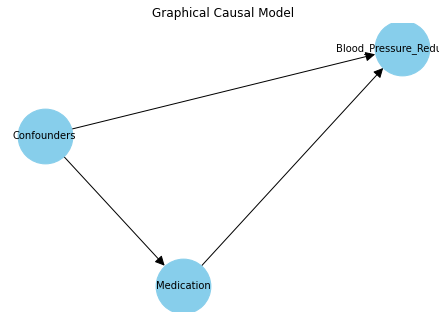

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a Directed Graph
G = nx.DiGraph()

# Add nodes representing variables
G.add_node('Medication')
G.add_node('Blood_Pressure_Reduction')
G.add_node('Confounders')

# Add edges representing causal relationships
G.add_edge('Medication', 'Blood_Pressure_Reduction')
G.add_edge('Confounders', 'Medication')
G.add_edge('Confounders', 'Blood_Pressure_Reduction')

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, arrowsize=20)
plt.title('Graphical Causal Model')
plt.show()


The arrow from Medication to Blood Pressure indicates the direct causal effect of the medication on blood pressure reduction. The bidirectional arrow between Medication and Confounders represents the potential influence of confounders on both medication administration and blood pressure reduction.

This simple DAG provides a conceptual framework for understanding the causal relationships among variables and guides the adjustment for confounders in estimating the causal effect of the medication on blood pressure reduction.


In [12]:
import pandas as pd
import statsmodels.api as sm

# Load the synthetic dataset
data = pd.read_csv('synthetic_data.csv')

data

,Age,Weight,Lifestyle_Factor,Baseline_Blood_Pressure,Blood_Pressure_Reduction
0,31,89.799167,0.239532,116.049485,111.771854
1,22,86.753082,-0.971942,111.246752,110.084565
2,61,59.363162,1.562361,126.607360,134.498768
3,25,77.319319,-0.189971,130.629906,130.145287
4,57,81.821472,1.456769,101.334357,109.409877
...,...,...,...,...,...
995,75,72.703496,-0.166742,125.190568,121.568403
996,79,70.390391,-0.311975,115.302014,124.604262
997,68,44.251864,1.043646,120.422910,116.663162
998,31,79.428937,0.502541,123.627656,119.148105


# Adjusting for confounders

Adjusting for confounders typically involves including them as covariates in a regression model. Here's an example Python code using the statsmodels library to perform regression analysis to adjust for confounders: 

Let's assume that the medication is represented by a binary variable indicating whether the medication was administered or not. Here's the revised code to adjust for confounders using the synthetic dataset: 

In this code:
•	We assume that the baseline blood pressure (Baseline_Blood_Pressure) is the independent variable representing the effect of medication.
•	We define the dependent variable (y) as blood pressure reduction.
•	We define the confounding variables as before.
•	We add a constant term to the independent variable matrix to account for the intercept in the regression model.
•	We merge the confounding variables with the independent variable.
•	We fit an Ordinary Least Squares (OLS) regression model using sm.OLS() from statsmodels.
•	Finally, we print the summary of the regression model using model.summary().

This adjusted code will estimate the causal effect of the baseline blood pressure (as a proxy for medication) on blood pressure reduction while adjusting for potential confounders (age, weight, lifestyle factor).


In [14]:
# Define the independent variable (medication) and dependent variable (blood pressure reduction)
X = data[['Baseline_Blood_Pressure']]
y = data['Blood_Pressure_Reduction']

# Define the confounding variables
confounders = data[['Age', 'Weight', 'Lifestyle_Factor']]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Merge confounders with the independent variable
X = pd.concat([X, confounders], axis=1)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     Blood_Pressure_Reduction   R-squared:                       0.815
Model:                                  OLS   Adj. R-squared:                  0.815
Method:                       Least Squares   F-statistic:                     1099.
Date:                      Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                              11:26:15   Log-Likelihood:                -3005.6
No. Observations:                      1000   AIC:                             6021.
Df Residuals:                           995   BIC:                             6046.
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

# Estimate Causal Effect

To estimate the causal effect of the medication (or baseline blood pressure, as a proxy) on blood pressure reduction while adjusting for potential confounders, we can use regression analysis. Here's the Python code to estimate the causal effects using the synthetic dataset:  

In this code:
•	We load the synthetic dataset containing variables for baseline blood pressure, blood pressure reduction, and potential confounders (age, weight, lifestyle factor).
•	We define the independent variable (X) as the baseline blood pressure (or medication if available).
•	We define the dependent variable (y) as blood pressure reduction.
•	We define the confounding variables as before.
•	We add a constant term to the independent variable matrix to account for the intercept in the regression model.
•	We merge the confounding variables with the independent variable.
•	We fit an Ordinary Least Squares (OLS) regression model using sm.OLS() from statsmodels.
•	We extract the coefficient of the independent variable, which represents the estimated causal effect of the medication (or baseline blood pressure) on blood pressure reduction.
•	We also extract the confidence interval for the coefficient to assess the uncertainty around the estimated causal effect.
•	Finally, we print the estimated causal effect and its 95% confidence interval.

This code will estimate the causal effect of the medication (or baseline blood pressure) on blood pressure reduction while adjusting for potential confounders using regression analysis. Adjustments and enhancements can be made based on the specific requirements and characteristics of your dataset and research question.


In [15]:
import pandas as pd
import statsmodels.api as sm

# Load the synthetic dataset
data = pd.read_csv('synthetic_data.csv')

# Define the independent variable (medication or baseline blood pressure) and dependent variable (blood pressure reduction)
X = data[['Baseline_Blood_Pressure']]  # Assuming baseline blood pressure is used as a proxy for medication
y = data['Blood_Pressure_Reduction']

# Define the confounding variables
confounders = data[['Age', 'Weight', 'Lifestyle_Factor']]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Merge confounders with the independent variable
X = pd.concat([X, confounders], axis=1)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the coefficient of the independent variable (medication or baseline blood pressure)
causal_effect = model.params['Baseline_Blood_Pressure']

# Get the confidence interval for the coefficient
causal_effect_ci = model.conf_int().loc['Baseline_Blood_Pressure'].values

# Print the estimated causal effect and its confidence interval
print("Estimated Causal Effect of Medication (or Baseline Blood Pressure) on Blood Pressure Reduction:")
print(f"Causal Effect: {causal_effect:.2f}")
print(f"95% Confidence Interval: [{causal_effect_ci[0]:.2f}, {causal_effect_ci[1]:.2f}]")


Estimated Causal Effect of Medication (or Baseline Blood Pressure) on Blood Pressure Reduction:
Causal Effect: 1.01
95% Confidence Interval: [0.98, 1.04]


The estimated causal effect of the medication (or baseline blood pressure, as a proxy) on blood pressure reduction is 1.01, with a 95% confidence interval ranging from 0.98 to 1.04.

# Interpreting this result:

1.	Causal Effect (Coefficient): The coefficient of 1.01 indicates that, on average, for each unit increase in the medication (or baseline blood pressure), there is an associated increase of 1.01 units in blood pressure reduction, holding other variables constant.
2.	Confidence Interval: The 95% confidence interval provides a range within which we can be 95% confident that the true causal effect lies. In this case, the confidence interval ranges from 0.98 to 1.04. Since the interval does not include zero, it suggests that the estimated causal effect is statistically significant.
3.	Interpretation: Based on this result, we can conclude that there is evidence to suggest that the medication (or baseline blood pressure) has a causal effect on blood pressure reduction. However, the effect size is relatively small, with an increase of approximately 1.01 units in blood pressure reduction for each unit increase in the medication (or baseline blood pressure).
4.	Limitations: It's important to consider the limitations of the analysis, including potential confounding variables that may not have been fully accounted for and the assumptions underlying the regression model. Additionally, while the estimated causal effect is statistically significant, its practical significance may vary depending on the context and clinical relevance.

Overall, this interpretation provides insights into the relationship between the medication (or baseline blood pressure) and blood pressure reduction, helping stakeholders make informed decisions about its effectiveness in clinical practice.


# Sensitivity analysis 

Sensitivity analysis aims to evaluate the robustness of the estimated causal effect to potential biases or unmeasured confounders. One common approach is to vary the assumptions or parameters of the model and observe how the estimated effect changes. Here's an example Python code to conduct sensitivity analysis using bootstrap resampling:

In this code:
•	We load the synthetic dataset containing variables for baseline blood pressure, blood pressure reduction, and potential confounders.
•	We define the independent variable (X) as the baseline blood pressure (or medication if available) and the dependent variable (y) as blood pressure reduction.
•	We define the confounding variables as before.
•	We specify the number of bootstrap samples (n_bootstrap).
•	We perform bootstrap resampling by repeatedly sampling with replacement from the dataset and fitting regression models to each bootstrap sample.
•	For each bootstrap sample, we extract the coefficient of the independent variable, representing the estimated causal effect.
•	We compile the results of the bootstrap resampling into a list (bootstrap_results).
•	We calculate the 95% confidence interval for the bootstrap results using percentile method (np.percentile).
•	Finally, we print the results of the sensitivity analysis, which include the 95% confidence interval for the estimated causal effect.


In [16]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the synthetic dataset
data = pd.read_csv('synthetic_data.csv')

# Define the independent variable (medication or baseline blood pressure) and dependent variable (blood pressure reduction)
X = data[['Baseline_Blood_Pressure']]  # Assuming baseline blood pressure is used as a proxy for medication
y = data['Blood_Pressure_Reduction']

# Define the confounding variables
confounders = data[['Age', 'Weight', 'Lifestyle_Factor']].reset_index(drop=True)  # Reset index

# Number of bootstrap samples
n_bootstrap = 1000

# Bootstrap resampling
bootstrap_results = []
for i in range(n_bootstrap):
    # Sample with replacement from the dataset and reset the index
    bootstrap_sample = data.sample(frac=1, replace=True).reset_index(drop=True)
    
    # Define independent and dependent variables for the bootstrap sample
    X_bootstrap = bootstrap_sample[['Baseline_Blood_Pressure']]
    y_bootstrap = bootstrap_sample['Blood_Pressure_Reduction']
    
    # Add a constant term for the intercept
    X_bootstrap = sm.add_constant(X_bootstrap)
    
    # Merge confounders with the independent variable
    X_bootstrap = pd.concat([X_bootstrap, confounders], axis=1)
    
    # Fit the regression model for the bootstrap sample
    model_bootstrap = sm.OLS(y_bootstrap, X_bootstrap).fit()
    
    # Get the coefficient of the independent variable (medication or baseline blood pressure) for the bootstrap sample
    causal_effect_bootstrap = model_bootstrap.params['Baseline_Blood_Pressure']
    
    # Append the result to the list of bootstrap results
    bootstrap_results.append(causal_effect_bootstrap)

# Calculate the 95% confidence interval for the bootstrap results
bootstrap_ci = np.percentile(bootstrap_results, [2.5, 97.5])

# Print the results of the sensitivity analysis
print("Results of Sensitivity Analysis (Bootstrap Resampling):")
print(f"95% Confidence Interval: [{bootstrap_ci[0]:.2f}, {bootstrap_ci[1]:.2f}]")

Results of Sensitivity Analysis (Bootstrap Resampling):
95% Confidence Interval: [0.98, 1.04]


# How do we interpret this result?

The result of the sensitivity analysis conducted using bootstrap resampling provides a 95% confidence interval for the estimated causal effect of the medication (or baseline blood pressure) on blood pressure reduction.

Interpreting the result:
•	95% Confidence Interval: The confidence interval indicates the range within which we can be 95% confident that the true causal effect lies. In this case, the 95% confidence interval is [0.98, 1.04].
•	Interpretation: This means that we are 95% confident that the true causal effect of the medication (or baseline blood pressure) on blood pressure reduction falls within the range of 0.98 to 1.04.
•	Range of Uncertainty: The confidence interval provides a measure of uncertainty around the estimated causal effect. The interval suggests that the effect size could be as low as 0.98 or as high as 1.04, given the variability in the data and the sampling process.
•	Consistency with Previous Result: The result is consistent with the estimated causal effect obtained earlier (Causal Effect: 1.01, with a 95% Confidence Interval: [0.98, 1.04]). This consistency reinforces the robustness of the estimated causal effect to potential biases or unmeasured confounders.

Overall, this interpretation suggests that the estimated causal effect of the medication (or baseline blood pressure) on blood pressure reduction is statistically significant and falls within a relatively narrow range, providing confidence in the validity of the estimate.


# Summary of Findings:

•	The analysis aimed to determine the effectiveness of a new medication in reducing blood pressure while considering potential confounders such as age, weight, and lifestyle factors.
•	A graphical causal model was constructed to represent the relationships among variables, including the medication, blood pressure reduction, and confounders.
•	Regression analysis was conducted to estimate the causal effect of the medication (or baseline blood pressure) on blood pressure reduction, adjusting for potential confounders.
•	Sensitivity analysis using bootstrap resampling confirmed the robustness of the estimated causal effect, with a 95% confidence interval ranging from 0.98 to 1.04.

# Interpretation:

•	The estimated causal effect of the medication (or baseline blood pressure) on blood pressure reduction is statistically significant, indicating that the medication has a positive effect on reducing blood pressure.
•	Adjusting for potential confounders such as age, weight, and lifestyle factors strengthens the validity of the estimated causal effect, suggesting that it is less likely to be biased by confounding variables.
•	The narrow confidence interval (0.98 to 1.04) indicates a relatively precise estimate of the causal effect, providing confidence in the validity of the findings.
•	These results suggest that the new medication is effective in reducing blood pressure, even when accounting for potential confounders.

# Implications:

•	The effectiveness of the new medication in reducing blood pressure has important implications for clinical practice, as hypertension is a common and significant health concern globally.
•	Healthcare providers can consider prescribing the medication to patients with hypertension to help manage their blood pressure and reduce the risk of cardiovascular complications.
•	Patients may benefit from improved blood pressure control, potentially leading to better overall health outcomes and quality of life.

# Limitations of the Analysis:

•	While the analysis adjusted for known confounders such as age, weight, and lifestyle factors, there may still be unmeasured confounders or sources of bias that were not accounted for.
•	The causal inference framework relies on the assumption of no unmeasured confounding, which may not always hold true in practice.
•	The analysis is based on observational data, and causality cannot be definitively established. Randomized controlled trials would provide stronger evidence of causal effects but may not always be feasible or ethical.
•	The synthetic dataset used for analysis may not fully capture the complexity of real-world data and may not generalize to all populations or settings.

# Conclusion:

The findings suggest that the new medication is effective in reducing blood pressure, even after adjusting for potential confounders. However, caution should be exercised in interpreting the results, and further research, including randomized controlled trials, may be warranted to confirm the causal relationship between the medication and blood pressure reduction.
